<a href="https://colab.research.google.com/github/anishadh137/PUS2020_AAdhikari/blob/master/HW5/PUS2020_HW5_AAdhikari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 14.8MB 233kB/s 
     |████████████████████████████████| 10.9MB 43.7MB/s 


In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
import geopandas as gpd

In [3]:
#Reading in data 
#Electroral Boundaries 
# From https://opendata.arcgis.com/datasets/91c1f132c7d34885983c56b47dc675fd_0.geojson
de_elecp = gpd.read_file("https://opendata.arcgis.com/datasets/91c1f132c7d34885983c56b47dc675fd_0.geojson")

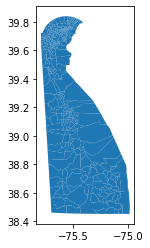

In [4]:
de_elecp.plot()

In [5]:
de_elecp.head()

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746..."
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760..."
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686..."
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661..."
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658..."


In [6]:
#reading in the turnout data 
#kepping only election district and votes 
turnout = pd.read_csv("https://raw.githubusercontent.com/openelections/openelections-data-de/master/2018/20181106__de__general__precinct.csv")

In [7]:
turnout

,county,election_district,office,district,party,candidate,election_day,absentee,votes
0,New Castle,01-01,U.S. Senate,NaN,DEMOCRATIC,Carper T,552,29,581
1,New Castle,01-01,U.S. Senate,NaN,REPUBLICAN,Arlett R,50,1,51
2,New Castle,01-01,U.S. Senate,NaN,GREEN,Theodoropo,5,0,5
3,New Castle,01-01,U.S. Senate,NaN,LIBERTARIN,Frost N,4,2,6
4,New Castle,02-01,U.S. Senate,NaN,DEMOCRATIC,Carper T,903,34,937
...,...,...,...,...,...,...,...,...,...
4719,Sussex,07-41,State Assembly,41.0,REPUBLICAN,Collins R,523,22,545
4720,Sussex,08-41,State Assembly,41.0,DEMOCRATIC,Connor S B,180,11,191
4721,Sussex,08-41,State Assembly,41.0,REPUBLICAN,Collins R,327,8,335
4722,Sussex,Total,State Assembly,41.0,DEMOCRATIC,Connor S B,3172,216,3388


In [8]:
#slicing the data to keep only required columns

In [9]:
turnout.drop(['county','office','district','party','candidate','election_day',
              'absentee'], axis=1, inplace=True)

In [10]:
turnout

,election_district,votes
0,01-01,581
1,01-01,51
2,01-01,5
3,01-01,6
4,02-01,937
...,...,...
4719,07-41,545
4720,08-41,191
4721,08-41,335
4722,Total,3388


In [11]:
turnout=turnout.groupby("election_district").sum()

In [12]:
de_elecp.columns

Index(['OBJECTID', 'ID', 'EDRD_2012', 'POPULATION', 'DISTRICT',
       'EGIS_OWNERElection_ED_RD_2012AREA', 'geometry'],
      dtype='object')

In [13]:
#merging the turnout data with the electoral map 
de_elecmap=de_elecp.merge(turnout, left_on='EDRD_2012', right_index=True)

In [14]:
de_elecmap.head()

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry,votes
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746...",2598
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760...",4390
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686...",690
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661...",4399
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658...",2722


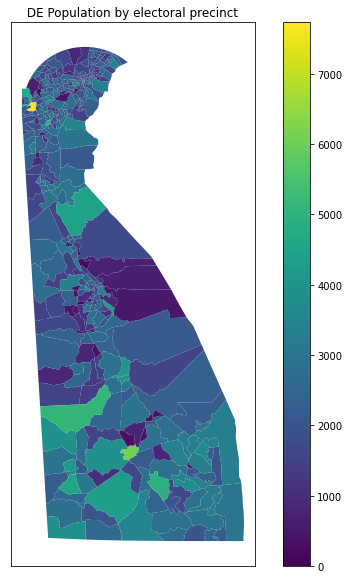

In [15]:
#plotting population by electoral precinct

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
de_elecmap.plot(column='POPULATION',cmap='viridis',alpha=1,linewidth=0.1,ax=ax, legend=True, k=5)
plt.title(" DE Population by electoral precinct ");

Fig 1. This shows the Population by electoral precincts in Delaware in the year of 2018.


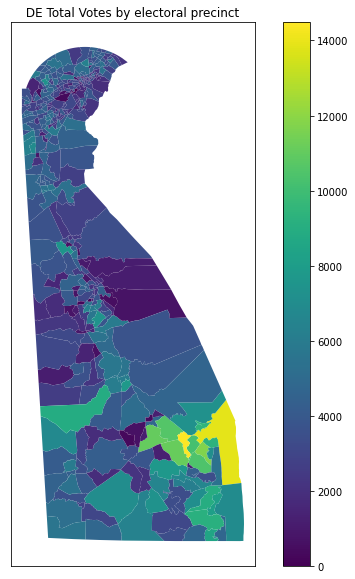

In [16]:
##plotting Total Votes by electoral precinct

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
de_elecmap.plot(column='votes',cmap='viridis',alpha=1,linewidth=0.1,ax=ax, legend=True, k=5)
plt.title(" DE Total Votes by electoral precinct ");

Fig 2. This shows the Total Votes by electoral precinct in Delaware for the year of 2018.


In [17]:
#adding population density column 
de_elecmap['popdenisty']=de_elecmap['POPULATION']/de_elecmap['geometry'].area

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


In [45]:
#adding log of pop density
de_elecmap['popdensity_log'] = np.log10(de_elecmap.popdenisty)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [46]:
de_elecmap.head()

,OBJECTID,ID,EDRD_2012,POPULATION,DISTRICT,EGIS_OWNERElection_ED_RD_2012AREA,geometry,votes,popdenisty,popdensity_log
0,1,20,01-21,1171,21,None,"POLYGON ((-75.67816 39.74598, -75.67807 39.746...",2598,1.121451e+07,7.049780
1,2,21,01-22,1755,22,None,"POLYGON ((-75.72394 39.76115, -75.72393 39.760...",4390,4.973350e+06,6.696649
2,3,22,01-23,1947,23,None,"POLYGON ((-75.73601 39.68660, -75.73603 39.686...",690,2.584061e+07,7.412303
3,4,23,01-24,2828,24,None,"POLYGON ((-75.69655 39.66154, -75.69666 39.661...",4399,8.206849e+06,6.914176
4,5,24,01-25,7734,25,None,"POLYGON ((-75.75158 39.65865, -75.75109 39.658...",2722,1.273635e+07,7.105045


In [37]:
import math

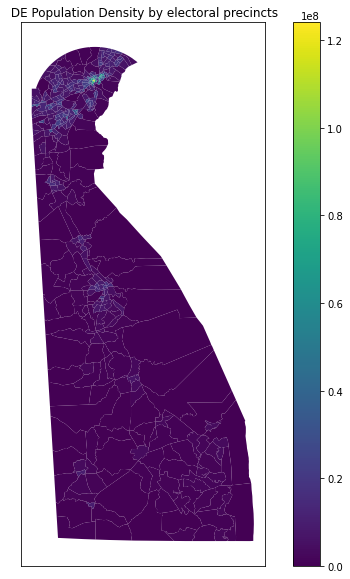

In [57]:
##plotting Pop Density by electoral precinct

f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
de_elecmap.plot(column= 'popdenisty',cmap='viridis',alpha=1,linewidth=0.1,ax=ax, legend=True, k=5,
                )
plt.title(" DE Population Density by electoral precincts");

Fig 3. Population Density Map of Delaware by Electoral Precincts in 2018.

**Looking at correlation between variables**

In [19]:
import scipy as sp  

In [20]:
de_elecmap.corr()

,OBJECTID,ID,POPULATION,votes,popdenisty
OBJECTID,1.000000,0.991589,0.037839,0.178269,-0.353672
ID,0.991589,1.000000,0.036542,0.178375,-0.353397
POPULATION,0.037839,0.036542,1.000000,0.624456,-0.032127
votes,0.178269,0.178375,0.624456,1.000000,-0.222520
popdenisty,-0.353672,-0.353397,-0.032127,-0.222520,1.000000


In [21]:
de_elecmap.votes.max()

14487

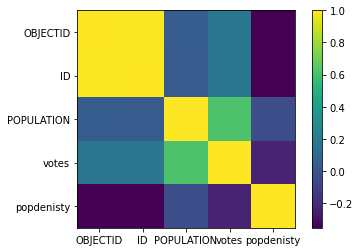

In [22]:
# Plotting the correlation matrix 
plt.imshow(de_elecmap.corr())
plt.xticks(range(len(de_elecmap.corr())), de_elecmap.corr().columns)
plt.yticks(range(len(de_elecmap.corr())), de_elecmap.corr().columns)
plt.colorbar();

In [23]:
#fitting a line model to the data 
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
#model 1 fitting votes and total population
mod1 = smf.ols(formula='votes ~ POPULATION', data=de_elecmap)
res = mod1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     272.9
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           9.24e-48
Time:                        14:02:32   Log-Likelihood:                -3778.5
No. Observations:                 429   AIC:                             7561.
Df Residuals:                     427   BIC:                             7569.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    897.8943    182.592      4.917      0.000     539.003    1256.786
POPULATION     1.3020      0.079     16.521      0.000       1.147       1.457
==============================================================================
Omnibus:                      144.314   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1162.455
Skew:                           1.206   Prob(JB):                    3.77e-253
Kurtosis:                      10.695   Cond. No.                     5.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#model 2 fitting votes and Population Density 
mod2 = smf.ols(formula='votes ~ POPULATION + popdenisty', data=de_elecmap)
res2 = mod2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     161.3
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           6.96e-53
Time:                        14:02:32   Log-Likelihood:                -3763.5
No. Observations:                 429   AIC:                             7533.
Df Residuals:                     426   BIC:                             7545.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1217.4017    185.725      6.555      0.000     852.350    1582.453
POPULATION     1.2885      0.076     16.899      0.000       1.139       1.438
popdenisty  -2.62e-05   4.73e-06     -5.542      0.000   -3.55e-05   -1.69e-05
==============================================================================
Omnibus:                      139.141   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1217.957
Skew:                           1.124   Prob(JB):                    3.34e-265
Kurtosis:                      10.943   Cond. No.                     4.78e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.78e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
#model 3 fitting votes and Population to the second degree polynomial
mod3 = smf.ols(formula='votes ~ POPULATION + (POPULATION)**2', data=de_elecmap)
res3 = mod3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     272.9
Date:                Tue, 06 Oct 2020   Prob (F-statistic):           9.24e-48
Time:                        14:17:17   Log-Likelihood:                -3778.5
No. Observations:                 429   AIC:                             7561.
Df Residuals:                     427   BIC:                             7569.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    897.8943    182.592      4.917      0.000     539.003    1256.786
POPULATION     1.3020      0.079     16.521      0.000       1.147       1.457
==============================================================================
Omnibus:                      144.314   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1162.455
Skew:                           1.206   Prob(JB):                    3.77e-253
Kurtosis:                      10.695   Cond. No.                     5.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Discussion of the model**


Looking at the model summary, we can see that the Adjusted R values of model 2 (which includes population and population density) is better than the other two models, depicitng a better relationship between the number of votes and the population and population density of the precincts. It shows that using population density along with population as a parameter can be a better indicator of the total number of votes as it also shows the level of urbanization of an electoral precinct. In this case, the complex model with two parameters seems to be working better than the simple model with just population as a parameter. 


---



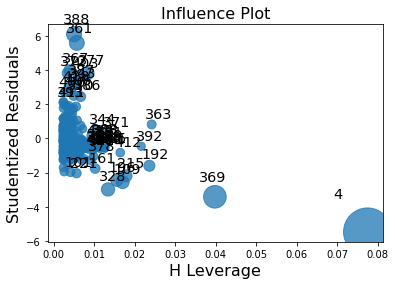

In [29]:
#making influence plots for votes and total pop
sm.graphics.influence_plot(res);

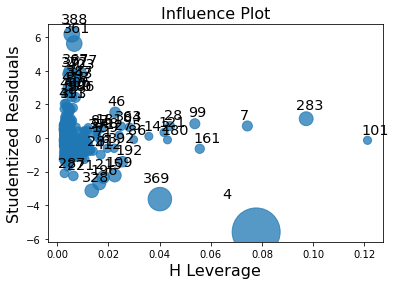

In [30]:
#making influence plots for votes and pop density
sm.graphics.influence_plot(res2);

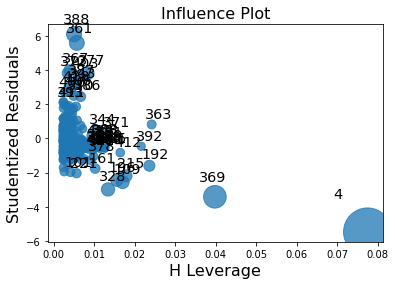

In [60]:
#making influence plots for votes and pop and pop2
sm.graphics.influence_plot(res3);

**Interpretation of the influence plots**
Looking at the influence plots we can see that there are some points at the edge of x axis for Model 1. Getting rid of that outlier could greatly influence the model.
Model 3 has the same influence plot as of Model 1. 

Similarly, there are some more points near the edge of x axis for Model 2. 


In [31]:
# comapring the models with the Likelihood Ration test 
res2.compare_lr_test(res)

(29.870233308536626, 4.619507925136413e-08, 1.0)

In [32]:
print('likelihood ration test - set alpha to alpha=0.05\n\n' ,  
      'the Null Hypothesis is that the more complex model is better than the simpler one\n\n' ,
'''the likelihood ration statistics is {0:.2f}, which corresponds to a p-value of {1:.2f}\n
since the likelishood ration statistics is chi square distributed 
with DoF the difference in the number of parameters in the 2 models (={2:.0f} here)
this corresponds not being able to reject the NH at alpha 0.05'''.format(*res2.compare_lr_test(res)))


likelihood ration test - set alpha to alpha=0.05

 the Null Hypothesis is that the more complex model is better than the simpler one

 the likelihood ration statistics is 29.87, which corresponds to a p-value of 0.00

since the likelishood ration statistics is chi square distributed 
with DoF the difference in the number of parameters in the 2 models (=1 here)
this corresponds not being able to reject the NH at alpha 0.05
